In [1]:
import numpy as np
import matplotlib.pyplot as plt

import glob

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#custom functions
from helpers import*
%matplotlib inline

In [2]:
forest_data_path = glob.glob("data/forest/*")
tallbuilding_data_path = glob.glob("data/tallbuilding/*")
highway_data_path = glob.glob("data/highway/*")

In [4]:
def modify_x(X, rowsize=36):
    temp_X = []
    for img_index in range(X.shape[0]//rowsize):
        temp_X.append((X[rowsize*img_index:rowsize*(img_index+1)]).sum(axis=0))
    return np.array(temp_X).reshape(-1,23)


In [5]:
cA = []
for item in forest_data_path:
    cA.append(np.loadtxt(item))

cB = []
for item in tallbuilding_data_path:
    cB.append(np.loadtxt(item))
    
cC = []
for item in highway_data_path:
    cC.append(np.loadtxt(item))
    
cA = modify_x(np.array(cA))
cB = modify_x(np.array(cB))
cC = modify_x(np.array(cC))

cA_train,cA_test = train_test_split(cA, test_size=0.3, random_state=42)
cB_train,cB_test = train_test_split(cB, test_size=0.3, random_state=42) 
cC_train,cC_test = train_test_split(cC, test_size=0.3, random_state=42) 

In [6]:
XA = cA_train.reshape(-1,23)
XB = cB_train.reshape(-1,23)
XC = cC_train.reshape(-1,23)

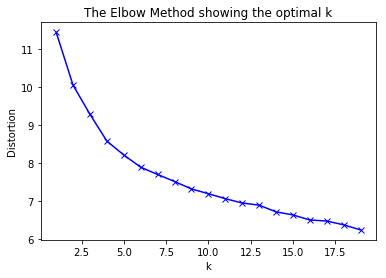

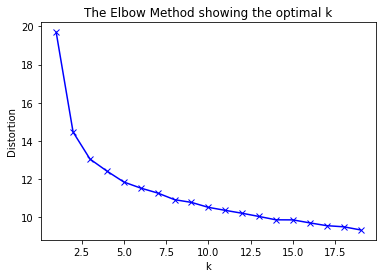

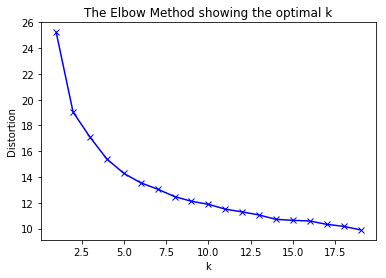

In [7]:
plot_elbow(XA, 20)
plot_elbow(XB, 20)
plot_elbow(XC, 20)

### Applying PCA to data

[ 51.6   61.21  69.16  74.84  78.69  81.95  84.92  87.72  90.13  92.24
  93.8   95.12  96.22  97.11  97.83  98.44  98.94  99.36  99.71  99.92
  99.97  99.97  99.97]


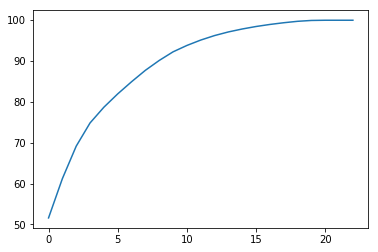

[  39.92   63.84   71.23   75.81   79.77   83.42   86.27   88.71   90.85
   92.82   94.46   95.75   96.91   97.82   98.48   98.96   99.36   99.6
   99.8    99.94  100.    100.    100.  ]


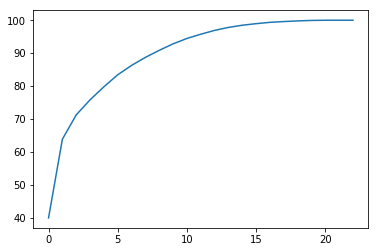

[ 45.09  67.9   74.66  79.56  83.54  86.85  89.8   92.17  93.77  95.36
  96.59  97.57  98.29  98.9   99.31  99.53  99.69  99.81  99.89  99.96
  99.98  99.99  99.99]


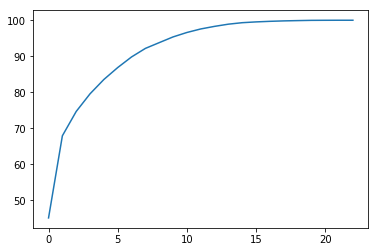

In [8]:
def pca_x(X):
    X = scale(X)
    pca = PCA(n_components=23)
    pca.fit(X)

    #The amount of variance that each PC explains
    var= pca.explained_variance_ratio_

    #Cumulative Variance explains
    var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

    print(var1)
    plt.plot(var1)
    plt.show()
    
pca_x(XA)
pca_x(XB)
pca_x(XC)

In [9]:
def transform_x(X,n=10):
    pca = PCA(n_components=n)
    pca.fit(X)
    return pca.fit_transform(X)

X1A = transform_x(XA)
X1B = transform_x(XB)
X1C = transform_x(XC)

In [88]:
X1 = transform_x(X)
t_ga = pipeline(X1, K=7)

LinAlgError: singular matrix

In [10]:
#A 40, #B 40, #C 40
gA_new = pipeline(X1A, K=7, error=1)
gB_new = pipeline(X1B, K=7, error=1)
gC_new = pipeline(X1C, K=7, error=1)

[ 27.84361862]
[ 27.84361862]
[ 18.88771102]
[ 13.81920632]
[ 13.66001125]
[ 5.36242559]
[ 4.00662921]
[ 1.94785082]
[ 1.45030181]
[ 2.13460734]
[ 4.4158822]
[ 3.27572506]
Iterations : 12
[ 14.93389283]
[ 14.93389283]
[ 7.71086546]
[ 6.16940071]
[ 11.13659603]
[ 11.20351198]
[ 7.48579328]
[ 7.12868727]
[ 1.8926986]
Iterations : 9
[ 12.75733947]
[ 12.75733947]
[ 4.33618175]
[ 6.97173017]
[ 3.01171838]
[ 3.98472099]
Iterations : 6


In [32]:
def class_scores(gmm, img_features):
    return gmm.predict_scores(img_features)

def classify(gA, gB, gC, img_feature):
    if class_scores(gA, img_feature) > max(class_scores(gB, img_feature), class_scores(gC, img_feature)):
        return 1
    elif class_scores(gB, img_feature) > max(class_scores(gA, img_feature), class_scores(gC, img_feature)):
        return 2
    else:
        return 3


In [33]:
#row_size :len of row size in entropy file
def count_classification(X, row_size=36):
    count_A = 0
    count_B = 0
    count_C = 0

    for i in range(X.shape[0]):
        if 1==classify(gA_new, gB_new, gC_new, X[i]):
            count_A+=1
        elif 2==classify(gA_new, gB_new, gC_new, X[i]):
            count_B+=1   
        else:
            count_C+=1

    print(count_A, count_B, count_C)
    
count_classification(X1A)
count_classification(X1B)
count_classification(X1C)

217 7 2
7 209 10
2 6 168


In [ ]:


while not success:
    try next.plan

